In [9]:
# importation des bibliotheques
import numpy as np
import pandas as pd
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import ConcatDataset
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

In [11]:
# chargement des images
originalImages = ImageFolder(root="/content/gdrive/MyDrive/IMAGES", transform=transforms.ToTensor())
print("original image dataset size:", len(originalImages))

original image dataset size: 538


In [13]:
# fonction pour afficher les 16 premieres images
def showBulkImages(images):
    plt.figure(figsize=(12, 10))

    for i in range(16):
        plt.subplot(4, 4, i + 1)
        image, label = images[i]
        plt.imshow(image.permute(1, 2, 0), cmap="Blues")

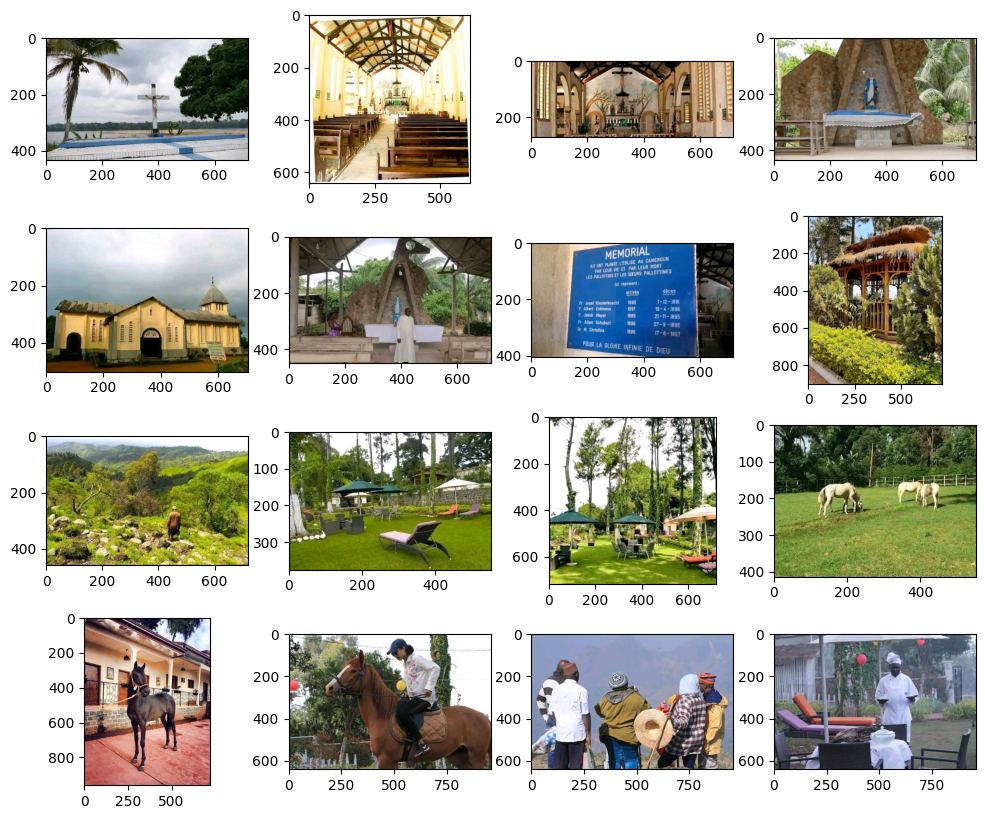

In [15]:
# affichage de quelques images
showBulkImages(originalImages)

In [17]:
# the transformer to be used for the color and rotation augumentation
colorAndRotationTransformation = transforms.Compose([
    transforms.ToTensor(),
    # we need to transform to a PIL image
    transforms.ToPILImage(),
    # this transformer will change the color parameters
    transforms.ColorJitter(brightness = 0.4, hue = 0.4),
    # this transformer will randomly rotate the image up to 30 degrees
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor()
])

coloAndRotationImages = ImageFolder(root="/content/gdrive/MyDrive/IMAGES", transform = colorAndRotationTransformation)

# le transformateur à utiliser pour le retournement horizontal et le passage en niveaux de gris
grayscaleAndFlipTransformation = transforms.Compose([
    transforms.ToTensor(),
    # we need to transform to a PIL image
    transforms.ToPILImage(),
    # transformer that randomly flips the image horizontaly
    transforms.RandomHorizontalFlip(),
    # transformer that randomly makes the picture grayscale
    transforms.RandomGrayscale(p=0.4),
    transforms.ToTensor()
])

grayAndFlipImages = ImageFolder(root="/content/gdrive/MyDrive/IMAGES", transform = grayscaleAndFlipTransformation)


# Transformer pour le recadrage aléatoire et la transformation de perspective
cropAndPerspectiveTransformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.ToPILImage(),
    transforms.RandomCrop(size=(224, 224)),  # Recadre à une taille de 224x224 pixels
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),  # Applique une perspective aléatoire
    transforms.ToTensor()
])

cropAndPerspectiveImages = ImageFolder(root="/content/gdrive/MyDrive/IMAGES", transform=cropAndPerspectiveTransformation)

# Transformer pour l'inversion verticale et le flou gaussien
flipAndBlurTransformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.ToPILImage(),
    transforms.RandomVerticalFlip(),  # Inverse verticalement l'image
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),  # Applique un flou gaussien
    transforms.ToTensor()
])

flipAndBlurImages = ImageFolder(root="/content/gdrive/MyDrive/IMAGES", transform=flipAndBlurTransformation)

# Transformer pour le zoom aléatoire et la déformation affine
zoomAndAffineTransformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.ToPILImage(),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),  # Zoom et recadre
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),  # Applique une transformation affine aléatoire
    transforms.ToTensor()
])

zoomAndAffineImages = ImageFolder(root="/content/gdrive/MyDrive/IMAGES", transform=zoomAndAffineTransformation)



# Afficher la taille des nouveaux ensembles de données
print("size of the cropAndPerspectiveImages dataset", len(cropAndPerspectiveImages))
print("size of the flipAndBlurImages dataset", len(flipAndBlurImages))
print("size of the zoomAndAffineImages dataset", len(zoomAndAffineImages))
print("taille des differents datasets", len(coloAndRotationImages), len(grayAndFlipImages))

size of the coloAndRotationImages and grayAndFlipImages datasets 538 538


In [21]:

# Transformer pour le recadrage aléatoire et la transformation de perspective
cropAndPerspectiveTransformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.ToPILImage(),
    transforms.RandomCrop(size=(224, 224)),  # Recadre à une taille de 224x224 pixels
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),  # Applique une perspective aléatoire
    transforms.ToTensor()
])

cropAndPerspectiveImages = ImageFolder(root="/content/gdrive/MyDrive/IMAGES", transform=cropAndPerspectiveTransformation)

# Transformer pour l'inversion verticale et le flou gaussien
flipAndBlurTransformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.ToPILImage(),
    transforms.RandomVerticalFlip(),  # Inverse verticalement l'image
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),  # Applique un flou gaussien
    transforms.ToTensor()
])

flipAndBlurImages = ImageFolder(root="/content/gdrive/MyDrive/IMAGES", transform=flipAndBlurTransformation)

# Transformer pour le zoom aléatoire et la déformation affine
zoomAndAffineTransformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.ToPILImage(),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),  # Zoom et recadre
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),  # Applique une transformation affine aléatoire
    transforms.ToTensor()
])

zoomAndAffineImages = ImageFolder(root="/content/gdrive/MyDrive/IMAGES", transform=zoomAndAffineTransformation)




size of the cropAndPerspectiveImages dataset 538
size of the flipAndBlurImages dataset 538
size of the zoomAndAffineImages dataset 538


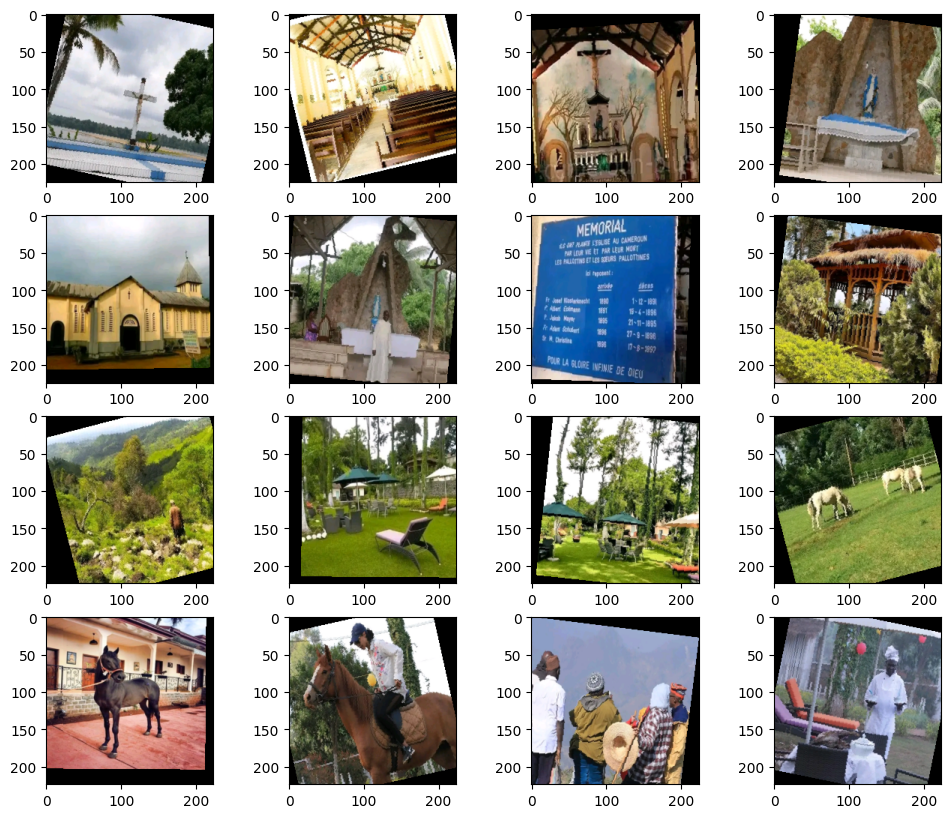

In [22]:
# show the changed color and rotation images
showBulkImages(zoomAndAffineImages)

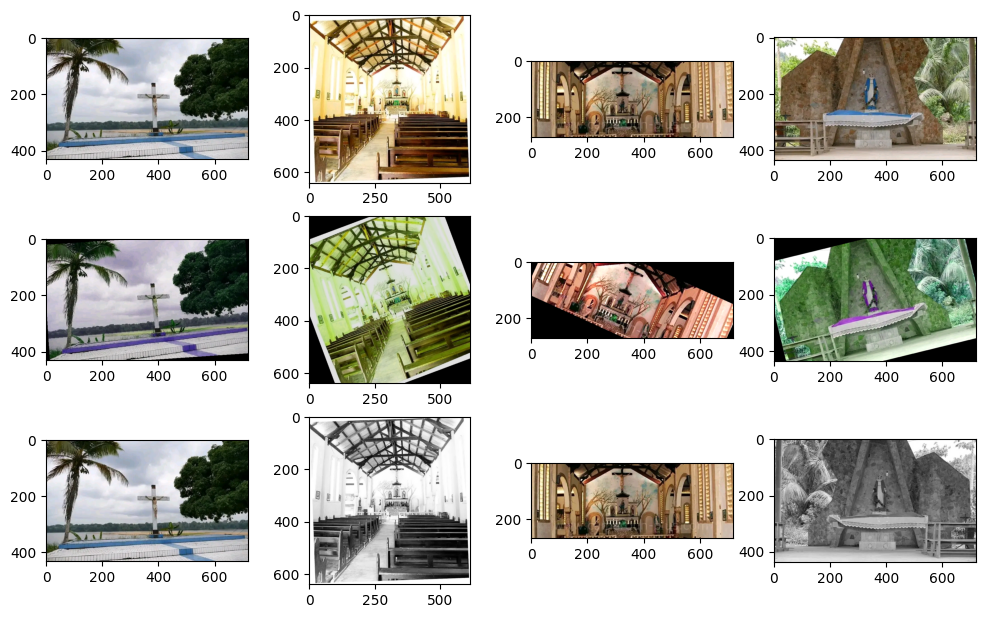

In [19]:
    plt.figure(figsize=(12, 10))

    for i in range(12):
        plt.subplot(4, 4, i + 1)

        if i < 4:
            image, label = originalImages[i]
            plt.imshow(image.permute(1, 2, 0), cmap="Blues")

        if i >= 4 and i < 8:
            image, label = coloAndRotationImages[i - 4]
            plt.imshow(image.permute(1, 2, 0), cmap="Blues")


        if i >= 8:
            image, label = grayAndFlipImages[i - 8]
            plt.imshow(image.permute(1, 2, 0), cmap="Blues")

In [20]:
# concaténer tous les jeux de données
allImages = ConcatDataset([originalImages, coloAndRotationImages, grayAndFlipImages])

print("all datasets size", len(allImages))

all datasets size 1614


In [23]:
!pip install folium


In [27]:
import requests

def get_coordinates(address):
    api_key = 'YOUR_GOOGLE_API_KEY'
    base_url = 'https://maps.googleapis.com/maps/api/geocode/json'
    params = {
        'address': address,
        'key': api_key
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data['results']:
            location = data['results'][0]['geometry']['location']
            return location['lat'], location['lng']
        else:
            return None, None
    else:
        return None, None

address = 'saint Anastasie, Yaoundé, Cameroun'
lat, lng = get_coordinates(address)
print(f'Latitude: {lat}, Longitude: {lng}')


Latitude: None, Longitude: None


In [26]:
import folium

# Coordonnées de saint anastasie à Yaoundé
latitude = 3.866667
longitude = 11.516667

# Créer une carte centrée 
map = folium.Map(location=[latitude, longitude], zoom_start=15)

# Ajouter un marqueur 
folium.Marker(
    location=[latitude, longitude],
    popup="saint anastasie",
    icon=folium.Icon(icon="info-sign")
).add_to(map)

# Afficher la carte
map
